In [568]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import collections
from sklearn.utils import shuffle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from keras.layers import Dropout
import time
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from keras.optimizers import SGD

In [569]:
data = pd.read_excel('data_diplom.xls', header = 1)

In [570]:
data.head()

,Номер,ФИО,Пол,Возраст,Диагноз,Рост,Вес,ХарТруда,ВрГода,ИМТ,...,УИ2,СВ2,СИ2,Рла2,ЧСС2,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,Конопов Я.М.,1,85,32213,169.0,82.0,6,2,28.710479,...,44.715289,6.55166,3.332611,26.342593,80.0,NaN,NaN,NaN,NaN,NaN
1,2,Галкин С.П.,1,85,32313,168.0,82.0,6,2,29.053288,...,46.098051,7.22854,3.687844,22.956349,80.0,NaN,NaN,NaN,NaN,NaN
2,3,Чекалин В.П.,1,54,21123,175.0,87.0,6,2,28.408163,...,35.330795,5.82423,2.826464,32.861111,80.0,NaN,NaN,NaN,NaN,NaN
3,4,Корчагин В.П.,1,64,22113,172.0,73.0,6,2,24.675500,...,44.870188,6.29740,3.365264,26.960227,75.0,NaN,NaN,NaN,NaN,NaN
4,5,Федоров В.Н.,1,49,61111,176.0,95.0,2,2,30.668905,...,53.303124,6.90619,3.198187,20.454545,60.0,NaN,NaN,NaN,NaN,NaN


In [571]:
data = shuffle(data, random_state = 42)

In [572]:
data.drop(['Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253', 'Unnamed: 254', 'Unnamed: 255'], axis = 1, inplace = True)

In [573]:
data.head()

,Номер,ФИО,Пол,Возраст,Диагноз,Рост,Вес,ХарТруда,ВрГода,ИМТ,...,VA2,VE/VA2,IVRT2,RR(DT)2,УО2,УИ2,СВ2,СИ2,Рла2,ЧСС2
136,137,Маслов Н.Н.,1,82,11124,178.0,71.0,6,4,22.408787,...,NaN,NaN,NaN,0.750000,96.164000,51.222040,7.693120,4.097763,30.113636,80.0
628,629,Малышев А.К.,1,56,51110,175.0,72.0,3,2,23.510204,...,0.93,0.903226,101.0,0.833333,85.891782,45.819450,6.184208,3.299000,21.753333,72.0
184,185,Покурин Б.И.,1,72,61324,173.0,72.0,6,3,24.056935,...,NaN,NaN,NaN,1.000000,87.117929,46.741406,5.995250,3.216633,25.000000,60.0
31,32,Глазков А.П.,1,54,61121,170.0,96.0,6,4,33.217993,...,NaN,NaN,NaN,0.750000,73.733125,34.560983,5.898650,2.764879,34.638889,80.0
677,678,Мамедиаров Г.Р.,1,44,52120,155.0,50.0,2,2,20.811655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN


In [575]:
data['Исход'][data['Исход'] == 1] = 0
data['Исход'][data['Исход'] == 2] = 1

In [576]:
important_features_categoric = data.columns[[19, 110, 117, 20, 69, 72, 73, 74, 75, 76, 90, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 142, 143]]
important_features_float = data.columns[[3, 111, 174, 175, 176, 198, 207, 208, 209, 211, 214, 223, 226]]

In [577]:
important_features_float

Index(['Возраст', 'АДсист', 'ПИ', 'Creatin', 'Gluc', 'ФУ1', 'СИ1', 'Рла1',
       'ЧСС1', 'Pсрлао(Адср)1', 'ИСПСН1', 'ИндНор1', 'ИММЛЖ1'],
      dtype='object')

In [578]:
important_features_categoric

Index(['Трансмур', 'ЧССкод', 'Килип', 'локализ', 'Тромболит', 'Бал дил', 'АКШ',
       'ПЭКС_АН', 'Наследств', 'ГБ', 'СвСсез', 'СД', 'СД+ГБ+Ож(МС)',
       'Хр.оч.инф', 'БолОбмена', 'ЗабЛегких', 'ЗабЩЖ', 'ЗабЖКТ', 'ПарМА',
       'ЧастПрост', 'EXTRсис', 'Кл.вар.ИМ', 'ФибрЖел', 'ЖелТахи', 'АВ блок',
       'Асистолия', 'Брадикард', 'СинусТахи', 'МА и ТП', 'ПарНаджТахи',
       'EXTRжел', 'EXTRпредс', 'EXTRполит', 'АВбл1-2', 'ПБЛНПГ', 'ПБПНЛГ'],
      dtype='object')

In [579]:
data_0 = data[data['Исход'] == 0]
data_1 = data[data['Исход'] == 1]

In [580]:
data_categoric = data[important_features_categoric]
data_categoric.describe()

,Трансмур,ЧССкод,Килип,локализ,Тромболит,Бал дил,АКШ,ПЭКС_АН,Наследств,ГБ,...,Брадикард,СинусТахи,МА и ТП,ПарНаджТахи,EXTRжел,EXTRпредс,EXTRполит,АВбл1-2,ПБЛНПГ,ПБПНЛГ
count,1040.000000,1034.000000,1034.000000,1040.000000,1039.000000,1037.000000,1037.000000,1037.000000,1040.000000,1040.000000,...,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,1.458654,2.251451,1.941973,1.618269,1.174206,1.027001,1.074253,1.008679,1.672115,3.674038,...,1.151351,1.206486,1.156757,1.010811,1.136216,1.072432,1.049730,1.048649,1.125405,1.049730
std,0.498527,0.707191,0.940906,0.822829,0.463991,0.162164,0.262308,0.092800,1.366867,1.823412,...,0.361590,0.405003,0.363768,0.103467,0.343204,0.259343,0.217504,0.215249,0.331357,0.217504
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,4.000000,4.000000,5.000000,3.000000,2.000000,2.000000,2.000000,7.000000,7.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [581]:
binary_columns = []
for column in data_categoric.columns:
    if max(data_categoric[column]) == 2:
        binary_columns.append(column)

In [582]:
data_binary_ = data[binary_columns]

In [583]:
data_binary = data_binary_.copy()
data_binary[data_binary_ == 1] = 0
data_binary[data_binary_ == 2] = 1

In [584]:
data_categoric.drop(binary_columns, axis = 1, inplace = True)

In [585]:
data_numeric = data[important_features_float]
data_numeric.describe()

,Возраст,АДсист,ПИ,Creatin,Gluc,ФУ1,СИ1,Рла1,ЧСС1,Pсрлао(Адср)1,ИСПСН1,ИндНор1,ИММЛЖ1
count,1040.000000,1034.000000,638.000000,722.000000,826.000000,895.000000,929.000000,987.000000,975.000000,995.000000,969.000000,1040.000000,887.000000
mean,61.234615,137.973888,85.973981,0.107816,6.315835,22.886010,2.556968,34.343012,78.880261,103.094472,58.393189,9.960365,187.605364
std,12.963737,32.053203,12.290007,0.040077,2.211614,9.917260,1.136472,18.309447,19.459189,21.881467,21.446419,3.607129,62.651925
min,19.000000,0.000000,47.000000,0.060000,2.200000,2.000000,0.190000,7.500000,38.000000,13.333333,6.000000,1.540000,58.795351
25%,51.000000,120.000000,80.000000,0.080250,5.000000,15.276320,1.807705,21.971750,65.500000,93.333333,44.000000,7.900000,143.967268
50%,59.000000,140.000000,87.900000,0.100000,5.670000,21.000000,2.400510,28.599358,75.000000,103.333333,60.666667,9.860000,179.759007
75%,72.000000,160.000000,95.000000,0.120000,6.975000,30.000000,3.108521,39.203844,90.000000,116.666667,73.333333,12.200000,221.680997
max,98.000000,240.000000,120.000000,0.590000,23.600000,54.166667,7.868584,127.371795,188.000000,170.000000,100.000000,23.880000,524.220171


In [586]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data_numeric_without_missing_0 = pd.DataFrame(imp.fit_transform(data_numeric[data['Исход'] == 0]), columns = data_numeric[data['Исход'] == 0].columns, index = data_numeric[data['Исход'] == 0].index)
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data_numeric_without_missing_1 = pd.DataFrame(imp.fit_transform(data_numeric[data['Исход'] == 1]), columns = data_numeric[data['Исход'] == 1].columns, index = data_numeric[data['Исход'] == 1].index)
data_numeric_without_missing = pd.concat([data_numeric_without_missing_0, data_numeric_without_missing_1], axis = 0)

scaler = StandardScaler()
data_numeric_result = pd.DataFrame(scaler.fit_transform(data_numeric_without_missing), columns = data_numeric_without_missing.columns, index = data_numeric_without_missing.index)
data_numeric_result.describe()

,Возраст,АДсист,ПИ,Creatin,Gluc,ФУ1,СИ1,Рла1,ЧСС1,Pсрлао(Адср)1,ИСПСН1,ИндНор1,ИММЛЖ1
count,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03,1.040000e+03
mean,2.152125e-16,-1.122179e-15,1.661171e-15,-4.530564e-16,6.853492e-16,-1.197760e-16,-9.415545e-17,1.852418e-16,-9.986670e-16,-2.634645e-16,7.376578e-17,-5.414472e-16,-6.324201e-16
std,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00,1.000481e+00
min,-3.259472e+00,-4.319550e+00,-4.018926e+00,-1.419380e+00,-2.097210e+00,-2.208225e+00,-2.211375e+00,-1.517580e+00,-2.174736e+00,-4.125589e+00,-2.525029e+00,-2.335491e+00,-2.226325e+00
25%,-7.898602e-01,-5.632249e-01,-2.825677e-01,-5.699628e-01,-6.337560e-01,-7.952022e-01,-6.496594e-01,-6.921354e-01,-7.030533e-01,-5.785405e-01,-6.651874e-01,-5.714674e-01,-6.870267e-01
50%,-1.724573e-01,6.282921e-02,4.001233e-02,-1.650485e-01,-1.291166e-01,-6.728119e-02,-5.983827e-02,-3.037326e-01,-1.774525e-01,3.833745e-02,4.026962e-02,-2.783756e-02,-9.478334e-02
75%,8.308225e-01,6.888833e-01,4.353142e-01,2.794545e-01,3.250588e-01,5.750021e-01,4.225788e-01,4.161790e-01,6.635088e-01,5.781057e-01,7.136604e-01,6.211900e-01,5.768973e-01
max,2.837382e+00,3.193100e+00,3.542924e+00,1.358699e+01,8.702072e+00,3.376071e+00,4.913213e+00,5.155310e+00,5.709276e+00,3.122727e+00,1.996309e+00,3.860780e+00,5.740090e+00


In [587]:
data_categoric.describe()

,ЧССкод,Килип,локализ,Тромболит,Наследств,ГБ,СвСсез,Хр.оч.инф,БолОбмена,ЗабЛегких,ЗабЩЖ,ЗабЖКТ,EXTRсис,Кл.вар.ИМ,Брадикард
count,1034.000000,1034.000000,1040.000000,1039.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1034.000000,925.000000
mean,2.251451,1.941973,1.618269,1.174206,1.672115,3.674038,2.144231,2.838462,1.415385,1.468269,1.037500,1.575962,1.296154,4.268859,1.151351
std,0.707191,0.940906,0.822829,0.463991,1.366867,1.823412,0.818674,2.183335,0.746215,0.841050,0.286926,1.028936,0.516135,4.048264,0.361590
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,2.000000,1.000000,2.000000,5.000000,3.000000,6.000000,2.000000,1.000000,1.000000,2.000000,2.000000,10.000000,1.000000
max,4.000000,4.000000,5.000000,3.000000,7.000000,7.000000,3.000000,6.000000,4.000000,3.000000,4.000000,4.000000,5.000000,12.000000,3.000000


In [588]:
imp = SimpleImputer(strategy = "most_frequent")
data_categoric_without_missing_0 = pd.DataFrame(imp.fit_transform(data_categoric[data['Исход'] == 0]), columns = data_categoric[data['Исход'] == 0].columns, index = data_categoric[data['Исход'] == 0].index)
imp = SimpleImputer(strategy = "most_frequent")
data_categoric_without_missing_1 = pd.DataFrame(imp.fit_transform(data_categoric[data['Исход'] == 1]), columns = data_categoric[data['Исход'] == 1].columns, index = data_categoric[data['Исход'] == 1].index)
data_categoric_without_missing = pd.concat([data_categoric_without_missing_0, data_categoric_without_missing_1], axis = 0)

data_categoric_without_missing.describe()

,ЧССкод,Килип,локализ,Тромболит,Наследств,ГБ,СвСсез,Хр.оч.инф,БолОбмена,ЗабЛегких,ЗабЩЖ,ЗабЖКТ,EXTRсис,Кл.вар.ИМ,Брадикард
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.00000,1040.000000
mean,2.250000,1.936538,1.618269,1.174038,1.672115,3.674038,2.144231,2.838462,1.415385,1.468269,1.037500,1.575962,1.296154,4.25000,1.134615
std,0.705403,0.940896,0.822829,0.463799,1.366867,1.823412,0.818674,2.183335,0.746215,0.841050,0.286926,1.028936,0.516135,4.04415,0.344284
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.000000,3.000000,2.000000,1.000000,2.000000,5.000000,3.000000,6.000000,2.000000,1.000000,1.000000,2.000000,2.000000,10.00000,1.000000
max,4.000000,4.000000,5.000000,3.000000,7.000000,7.000000,3.000000,6.000000,4.000000,3.000000,4.000000,4.000000,5.000000,12.00000,3.000000


In [589]:
data_categoric_without_missing.describe()

,ЧССкод,Килип,локализ,Тромболит,Наследств,ГБ,СвСсез,Хр.оч.инф,БолОбмена,ЗабЛегких,ЗабЩЖ,ЗабЖКТ,EXTRсис,Кл.вар.ИМ,Брадикард
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.00000,1040.000000
mean,2.250000,1.936538,1.618269,1.174038,1.672115,3.674038,2.144231,2.838462,1.415385,1.468269,1.037500,1.575962,1.296154,4.25000,1.134615
std,0.705403,0.940896,0.822829,0.463799,1.366867,1.823412,0.818674,2.183335,0.746215,0.841050,0.286926,1.028936,0.516135,4.04415,0.344284
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,3.000000,3.000000,2.000000,1.000000,2.000000,5.000000,3.000000,6.000000,2.000000,1.000000,1.000000,2.000000,2.000000,10.00000,1.000000
max,4.000000,4.000000,5.000000,3.000000,7.000000,7.000000,3.000000,6.000000,4.000000,3.000000,4.000000,4.000000,5.000000,12.00000,3.000000


In [590]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data_categoric_without_missing)
enc.get_feature_names()

array(['x0_1.0', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x1_1.0', 'x1_2.0',
       'x1_3.0', 'x1_4.0', 'x2_1.0', 'x2_2.0', 'x2_3.0', 'x2_4.0',
       'x2_5.0', 'x3_1.0', 'x3_2.0', 'x3_3.0', 'x4_1.0', 'x4_2.0',
       'x4_3.0', 'x4_4.0', 'x4_5.0', 'x4_6.0', 'x4_7.0', 'x5_1.0',
       'x5_2.0', 'x5_3.0', 'x5_4.0', 'x5_5.0', 'x5_6.0', 'x5_7.0',
       'x6_1.0', 'x6_2.0', 'x6_3.0', 'x7_1.0', 'x7_2.0', 'x7_3.0',
       'x7_4.0', 'x7_6.0', 'x8_1.0', 'x8_2.0', 'x8_3.0', 'x8_4.0',
       'x9_1.0', 'x9_2.0', 'x9_3.0', 'x10_1.0', 'x10_2.0', 'x10_4.0',
       'x11_1.0', 'x11_2.0', 'x11_3.0', 'x11_4.0', 'x12_1.0', 'x12_2.0',
       'x12_5.0', 'x13_1.0', 'x13_2.0', 'x13_3.0', 'x13_4.0', 'x13_5.0',
       'x13_6.0', 'x13_7.0', 'x13_8.0', 'x13_9.0', 'x13_10.0', 'x13_11.0',
       'x13_12.0', 'x14_1.0', 'x14_2.0', 'x14_3.0'], dtype=object)

In [591]:
new_names = []
for name in data_categoric_without_missing.columns:
    for number in range(1, len(pd.unique(data_categoric_without_missing[name])) + 1):
        new_names.append(name + str(number))
np.array(new_names).shape

(70,)

In [592]:
data_categoric_result = pd.DataFrame(enc.transform(data_categoric_without_missing).toarray(), columns = new_names, index = data_categoric_without_missing.index)

In [594]:
data_binary.describe()

,Трансмур,Бал дил,АКШ,ПЭКС_АН,СД,СД+ГБ+Ож(МС),ПарМА,ЧастПрост,ФибрЖел,ЖелТахи,...,Асистолия,СинусТахи,МА и ТП,ПарНаджТахи,EXTRжел,EXTRпредс,EXTRполит,АВбл1-2,ПБЛНПГ,ПБПНЛГ
count,1040.000000,1037.000000,1037.000000,1037.000000,1040.000000,1002.000000,1038.000000,1040.000000,925.000000,925.000000,...,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,0.458654,0.027001,0.074253,0.008679,0.201923,0.124750,0.231214,0.201923,0.041081,0.041081,...,0.032432,0.206486,0.156757,0.010811,0.136216,0.072432,0.049730,0.048649,0.125405,0.049730
std,0.498527,0.162164,0.262308,0.092800,0.401628,0.330601,0.421812,0.401628,0.198585,0.198585,...,0.177241,0.405003,0.363768,0.103467,0.343204,0.259343,0.217504,0.215249,0.331357,0.217504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [595]:
imp = SimpleImputer(strategy = "most_frequent")
data_binary_result_0 = pd.DataFrame(imp.fit_transform(data_binary[data['Исход'] == 0]), columns = data_binary[data['Исход'] == 0].columns, index = data_binary[data['Исход'] == 0].index)
imp = SimpleImputer(strategy = "most_frequent")
data_binary_result_1 = pd.DataFrame(imp.fit_transform(data_binary[data['Исход'] == 1]), columns = data_binary[data['Исход'] == 1].columns, index = data_binary[data['Исход'] == 1].index)
data_binary_result = pd.concat([data_binary_result_0, data_binary_result_1], axis = 0)

data_binary_result.describe()

,Трансмур,Бал дил,АКШ,ПЭКС_АН,СД,СД+ГБ+Ож(МС),ПарМА,ЧастПрост,ФибрЖел,ЖелТахи,...,Асистолия,СинусТахи,МА и ТП,ПарНаджТахи,EXTRжел,EXTRпредс,EXTRполит,АВбл1-2,ПБЛНПГ,ПБПНЛГ
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,0.458654,0.026923,0.074038,0.008654,0.201923,0.120192,0.230769,0.201923,0.036538,0.036538,...,0.028846,0.183654,0.139423,0.009615,0.121154,0.064423,0.044231,0.043269,0.111538,0.044231
std,0.498527,0.161937,0.261959,0.092667,0.401628,0.325343,0.421528,0.401628,0.187716,0.187716,...,0.167455,0.387388,0.346554,0.097632,0.326463,0.245623,0.205706,0.203560,0.314949,0.205706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [596]:
data_binary_result.shape

(1040, 21)

In [597]:
X = pd.concat([data_numeric_result, data_categoric_result, data_binary_result], axis = 1)

In [599]:
y = pd.DataFrame(data['Исход'], index = X.index)
df = pd.concat([X, y], axis = 1)

In [600]:
print('bad outcome', round(df['Исход'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')
print('good outcome', round(df['Исход'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')

bad outcome 12.4 % of the dataset
good outcome 87.6 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (1: good outcome || 1: bad outcome)')

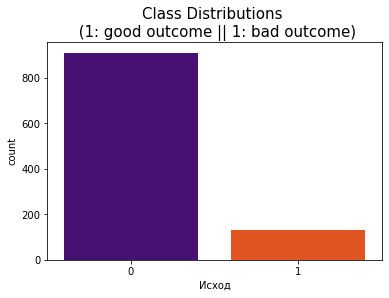

In [601]:
colors = ["#4B0082", "#FF4500"]

sns.countplot('Исход', data = df, palette = colors)
plt.title('Class Distributions \n (1: good outcome || 1: bad outcome)', fontsize = 15)

In [602]:
val1 = df[df['Исход'] == 0][10:20]
val2 = df[df['Исход'] == 0][100:110]
val3 = df[df['Исход'] == 1][10:20]
val4 = df[df['Исход'] == 1][100:110]
val = pd.concat([val1, val2, val3, val4], axis = 0)
val = shuffle(val, random_state = 0)
val.index

Int64Index([ 877,  873,  247,  850,  210,  405,  714,  458,  468,  874,  925,
             894,  899,   76,  910,  895,  376,   63,  908,  811,  932,  331,
             319, 1019,  282,  968,  258,  761,  902,  923,  233,  218,  629,
             880,  237,  440,  722,  242,  773,  869],
           dtype='int64')

In [603]:
df.drop(val.index, axis = 0, inplace = True)
df.shape

(1000, 105)

# undersample

In [405]:
df_under = df.copy()

In [406]:
df_under[df_under['Исход'] == 1].shape

(109, 105)

In [407]:
bad_df = df_under.loc[df_under['Исход'] == 1]
good_df = df_under.loc[df_under['Исход'] == 0][:109]
data = pd.concat([bad_df, good_df])
data.head()

,Возраст,АДсист,ПИ,Creatin,Gluc,ФУ1,СИ1,Рла1,ЧСС1,Pсрлао(Адср)1,...,СинусТахи,МА и ТП,ПарНаджТахи,EXTRжел,EXTRпредс,EXTRполит,АВбл1-2,ПБЛНПГ,ПБПНЛГ,Исход
289,1.062349,0.688883,-0.282568,1.165575,1.031554,-0.923659,0.974800,-0.492234,-0.492813,0.809435,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
491,0.599296,0.688883,-0.282568,-0.286824,-0.159395,2.073663,1.244309,-0.908723,-0.177453,0.192557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
256,0.599296,-0.876252,-0.282568,0.845733,0.930626,-0.495470,2.716684,1.504514,1.504470,-0.886980,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
377,0.367770,0.375856,0.228140,0.845733,0.627842,-1.780037,-0.208324,-0.760757,-0.177453,0.038337,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
280,0.367770,-0.719738,-0.282568,2.261428,0.436811,0.146813,0.181246,0.972795,1.346790,-0.809870,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Class Distributions in the subsample dataset
1    0.5
0    0.5
Name: Исход, dtype: float64


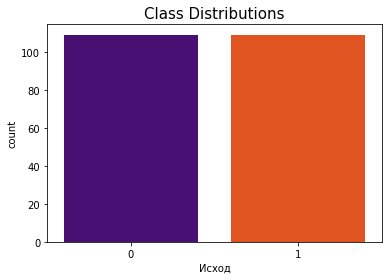

In [408]:
print('Class Distributions in the subsample dataset')
print(data['Исход'].value_counts()/len(data))
sns.countplot('Исход', data = data, palette = colors)
plt.title('Class Distributions', fontsize = 15)
plt.show()

In [409]:
y = data['Исход']

In [410]:
data.drop('Исход', axis = 1, inplace = True)

In [411]:
X = data.copy()

<AxesSubplot:>

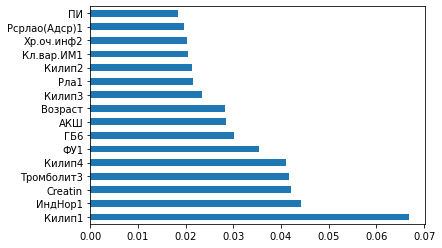

In [813]:
selected_features.nlargest(16).plot(kind = 'barh')

In [412]:
X_new = X[selected_features.nlargest(16).index]
y_new = y

In [413]:
X_new.shape

(218, 16)

In [62]:
df_under = X_new.copy()
df_under['Исход'] = pd.Series(y_new.values, index = X_new.index)
df_under = shuffle(df_under, random_state = 42)

In [63]:
df_under.head()

,Килип1,ИндНор1,Creatin,Тромболит3,Килип4,ФУ1,ГБ6,АКШ,Возраст,Килип3,Рла1,Килип2,Кл.вар.ИМ1,Хр.оч.инф2,Pсрлао(Адср)1,ПИ,Исход
269,0.0,1.736186,0.279454,0.0,0.0,-1.137753,0.0,0.0,0.676472,1.0,-0.303733,0.0,0.0,0.0,-1.349638,0.953249,1
213,1.0,-0.077763,-0.286824,0.0,0.0,-0.816612,0.0,0.0,0.444946,0.0,-0.204769,0.0,0.0,0.0,-0.270102,-0.496969,0
778,1.0,-0.355125,-0.853102,0.0,0.0,-0.281376,1.0,0.0,-0.095282,0.0,-0.467033,0.0,1.0,0.0,-0.424321,0.040012,0
859,0.0,-0.355125,-0.853102,0.0,0.0,0.575002,0.0,0.0,-0.018107,0.0,0.054539,1.0,1.0,0.0,-0.115882,0.207423,0
290,0.0,1.181462,1.165575,0.0,0.0,-1.030706,0.0,0.0,0.676472,1.0,1.304284,0.0,0.0,0.0,-0.886980,-0.282568,1


Text(0.5, 1.0, 'Correlation Matrix')

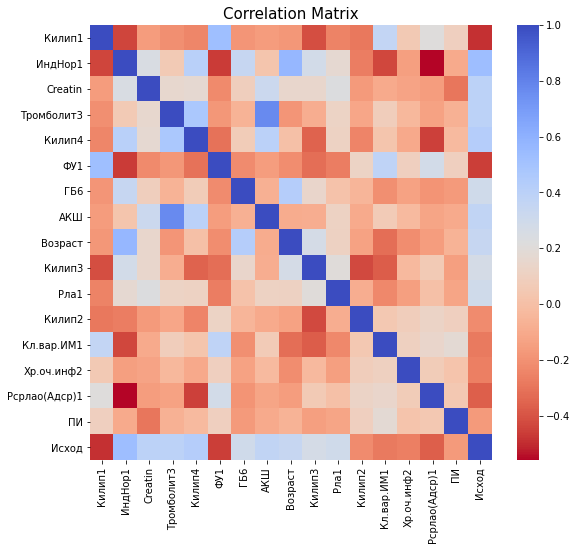

In [64]:
f, ax = plt.subplots(1, figsize = (9, 8))

corr = df_under.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size':20}, ax = ax)
ax.set_title("Correlation Matrix", fontsize = 15)

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 1)

In [415]:
X_train.to_csv('X_train_undersample.csv', index = True)
y_train.to_csv('y_train_undersample.csv', index = True)
X_test.to_csv('X_test_undersample.csv', index = True)
y_test.to_csv('y_test_undersample.csv', index = True)

In [493]:
lr_under = LogisticRegression().fit(X_train, y_train)
y_pred = lr_under.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 84.09%


In [494]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8679245283018868

In [495]:
equ = ''
for i in range(len(X_train.columns)):
    if np.squeeze(lr_under.coef_)[i] >= 0:
        equ += f' + {np.squeeze(lr_under.coef_)[i]:.2f} * {X_train.columns[i]}'
    else:
        equ += f'{np.squeeze(lr_under.coef_)[i]:.2f} * {X_train.columns[i]}'

In [496]:
equ += f' - {abs(lr_under.intercept_[0]):.2f}'

In [497]:
equ

'-1.23 * Килип1 + 0.27 * ИндНор1 + 0.53 * Creatin + 1.28 * Тромболит3 + 1.19 * Килип4-0.22 * ФУ1 + 0.98 * ГБ6 + 1.20 * АКШ + 0.58 * Возраст + 0.17 * Килип3 + 0.08 * Рла1-0.13 * Килип2-0.19 * Кл.вар.ИМ1-1.38 * Хр.оч.инф2-0.45 * Pсрлао(Адср)1-0.07 * ПИ - 1.20'

In [459]:
total_result_under = {}

In [460]:
total_result_under['logreg'] = results * 100

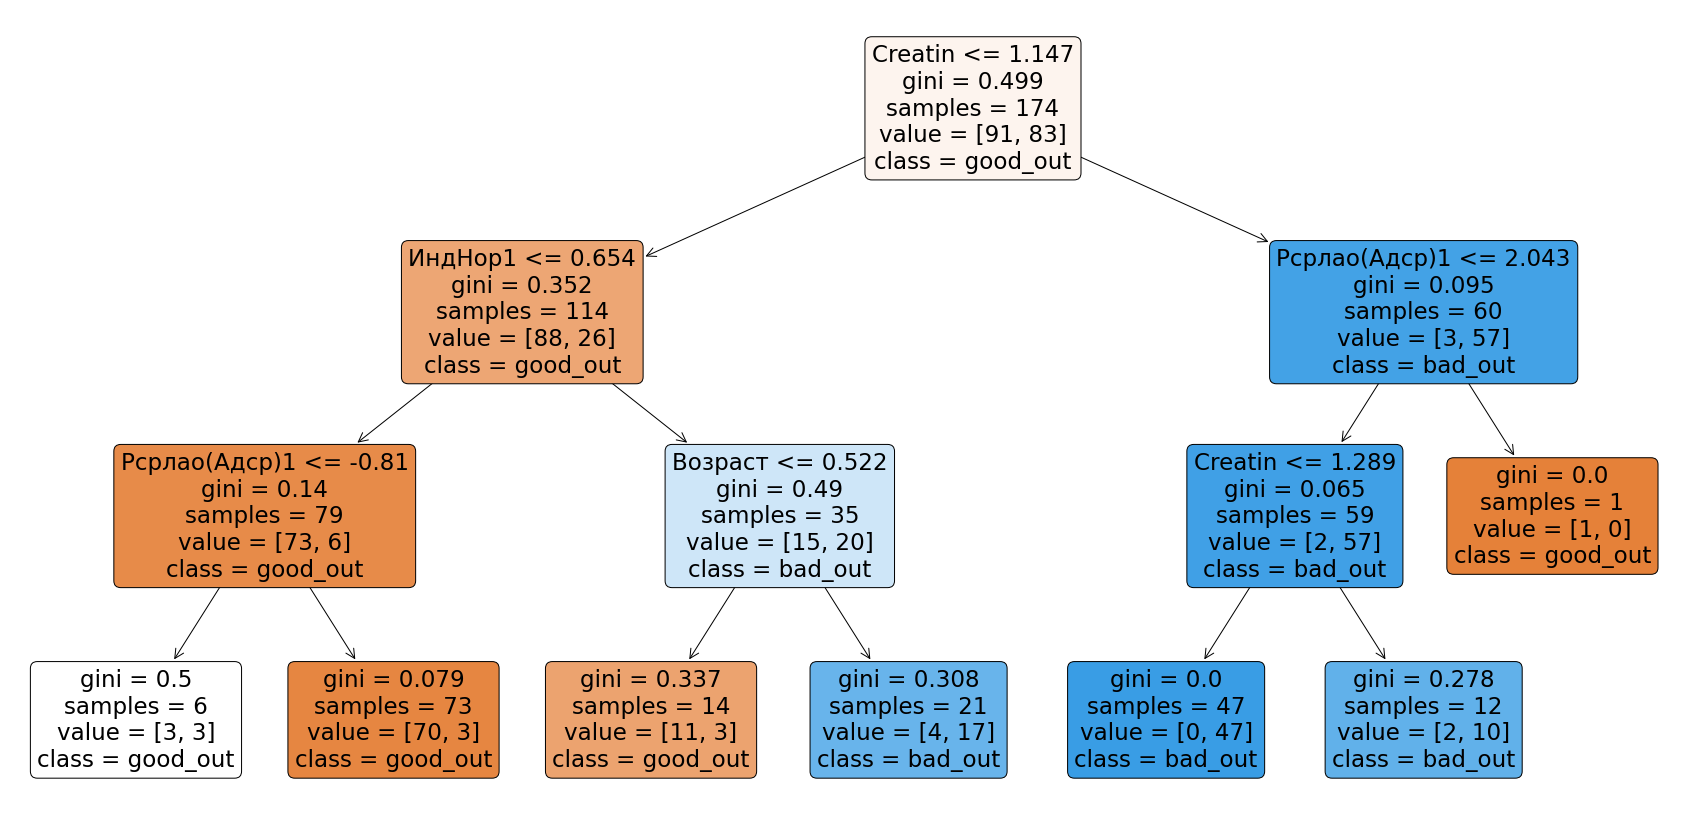

Results: 90.91%


In [461]:
from sklearn import tree

tr_under = tree.DecisionTreeClassifier(max_depth = 3, random_state = 1).fit(X_train, y_train)

plt.figure(figsize = (30,15))  
_ = tree.plot_tree(tr_under, class_names = ["good_out", "bad_out"], feature_names = list(X_train.columns), 
             filled = True, fontsize = 23, rounded = True)
plt.show()
y_pred = tr_under.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

In [462]:
f1_score(y_test, y_pred)

0.9230769230769231

In [463]:
total_result_under['tree'] = results * 100

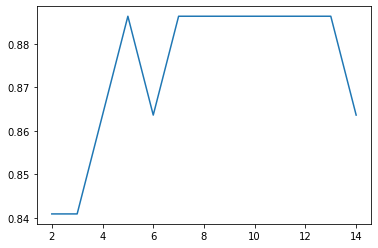

In [505]:
K_nearest_acc = []

for number in range(2, 15):
    clf = KNeighborsClassifier(n_neighbors = number).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    K_nearest_acc.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(2, 15)), K_nearest_acc)
plt.show()

In [506]:
kn_under = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = kn_under.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 88.64%


In [507]:
f1_score(y_test, y_pred)

0.8648648648648649

In [467]:
total_result_under['knn'] = results * 100

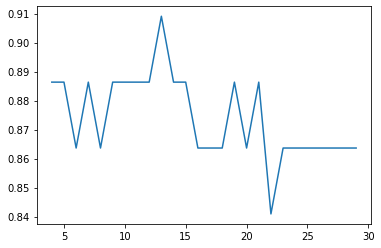

In [468]:
forest_acc = []

for number in range(4, 30):
    clf = RandomForestClassifier(n_estimators = number, random_state = 100, criterion = 'entropy').fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    forest_acc.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(4, 30)), forest_acc)
plt.show()

In [469]:
rf_under = RandomForestClassifier(n_estimators = 13, random_state = 100, criterion = 'entropy').fit(X_train, y_train)
y_pred = rf_under.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 90.91%


In [470]:
f1_score(y_test, y_pred)

0.9230769230769231

In [471]:
total_result_under['rand_forest'] = results * 100

In [472]:
nn_under = Sequential()

nn_under.add(Dense(10, input_dim = 16, activation = 'relu'))
nn_under.add(Dense(3, activation = 'relu'))
nn_under.add(Dense(3, activation = 'relu'))
nn_under.add(Dense(1, activation = 'sigmoid'))

nn_under.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

nn_under.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
174/174 [==============================] - 3s 1ms/step - loss: 0.7250 - accuracy: 0.5302
Epoch 2/100
174/174 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7464
Epoch 3/100
174/174 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.7264
Epoch 4/100
174/174 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.8325
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8464
Epoch 6/100
174/174 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8125
Epoch 7/100
174/174 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8877
Epoch 8/100
174/174 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8541
Epoch 9/100
174/174 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8722
Epoch 10/100
174/174 [==============================] - 0s 1ms/step - loss: 0.3460 - accura

In [473]:
y_pred = nn_under.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
results = accuracy_score(y_test, y_pred)
print(results)

[[16  2]
 [ 2 24]]
0.9090909090909091


In [474]:
f1_score(y_test, y_pred)

0.9230769230769231

In [475]:
total_result_under['nn'] = results * 100

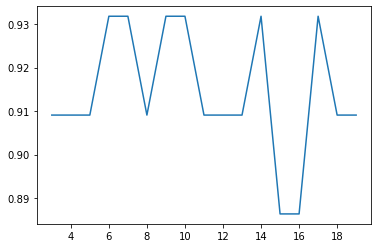

In [478]:
xg_acc_under = []

for number in range(3, 20):
    clf = XGBClassifier(n_estimators = number, max_depth = 5, random_state = 1, subsample = 0.7, eval_metric = "logloss").fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    xg_acc_under.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(3, 20)), xg_acc_under)
plt.show()

In [479]:
xg_under = XGBClassifier(n_estimators = 6, max_depth = 5, random_state = 1, subsample = 0.7, eval_metric = "logloss").fit(X_train, y_train)
y_pred = xg_under.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 93.18%


In [480]:
f1_score(y_test, y_pred)

0.9433962264150944

In [481]:
total_result_under['xg'] = results * 100


# Oversample

In [231]:
df_ = df.copy()
y = df_['Исход']
X = df_.drop(['Исход'], axis = 1)

In [232]:
selected_features.nlargest(16).index

Index(['Килип1', 'ИндНор1', 'Creatin', 'Тромболит3', 'Килип4', 'ФУ1', 'ГБ6',
       'АКШ', 'Возраст', 'Килип3', 'Рла1', 'Килип2', 'Кл.вар.ИМ1',
       'Хр.оч.инф2', 'Pсрлао(Адср)1', 'ПИ'],
      dtype='object')

In [233]:
X_new = X[selected_features.nlargest(16).index]
y_new = y

In [234]:
X_new.shape

(1000, 16)

In [235]:
from imblearn.over_sampling import SMOTENC

In [236]:
from collections import Counter
counter = Counter(y_new)
print(counter)

Counter({0: 891, 1: 109})


In [238]:
oversample = SMOTENC(categorical_features = [0, 3, 4, 6, 7, 9, 11, 12, 13])
X_new, y_new = oversample.fit_resample(X_new, y_new)

In [239]:
counter = Counter(y_new)
print(counter)

Counter({0: 891, 1: 891})


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 10)

In [282]:
lr_over = LogisticRegression().fit(X_train, y_train)
y_pred = lr_over.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 90.20%


In [376]:
X_train.to_csv('X_train_oversample.csv', index = True)
y_train.to_csv('y_train_oversample.csv', index = True)
X_test.to_csv('X_test_oversample.csv', index = True)
y_test.to_csv('y_test_oversample.csv', index = True)

In [283]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9076517150395779

In [284]:
total_result_over = {}

In [285]:
total_result_over['logreg'] = results * 100

In [286]:
equ = ''
for i in range(len(X_train.columns)):
    if np.squeeze(lr_over.coef_)[i] >= 0:
        equ += f' + {np.squeeze(lr_over.coef_)[i]:.2f} * {X_train.columns[i]}'
    else:
        equ += f'{np.squeeze(lr_over.coef_)[i]:.2f} * {X_train.columns[i]}'

In [287]:
equ += f' - {abs(lr_over.intercept_[0]):.2f}'

In [288]:
equ

'-3.39 * Килип1 + 0.38 * ИндНор1 + 0.86 * Creatin + 4.37 * Тромболит3-0.05 * Килип4-0.06 * ФУ1 + 0.23 * ГБ6 + 0.12 * АКШ + 0.81 * Возраст-0.02 * Килип3 + 0.07 * Рла1-2.48 * Килип2-1.51 * Кл.вар.ИМ1-2.66 * Хр.оч.инф2-0.39 * Pсрлао(Адср)1-0.15 * ПИ - 0.06'

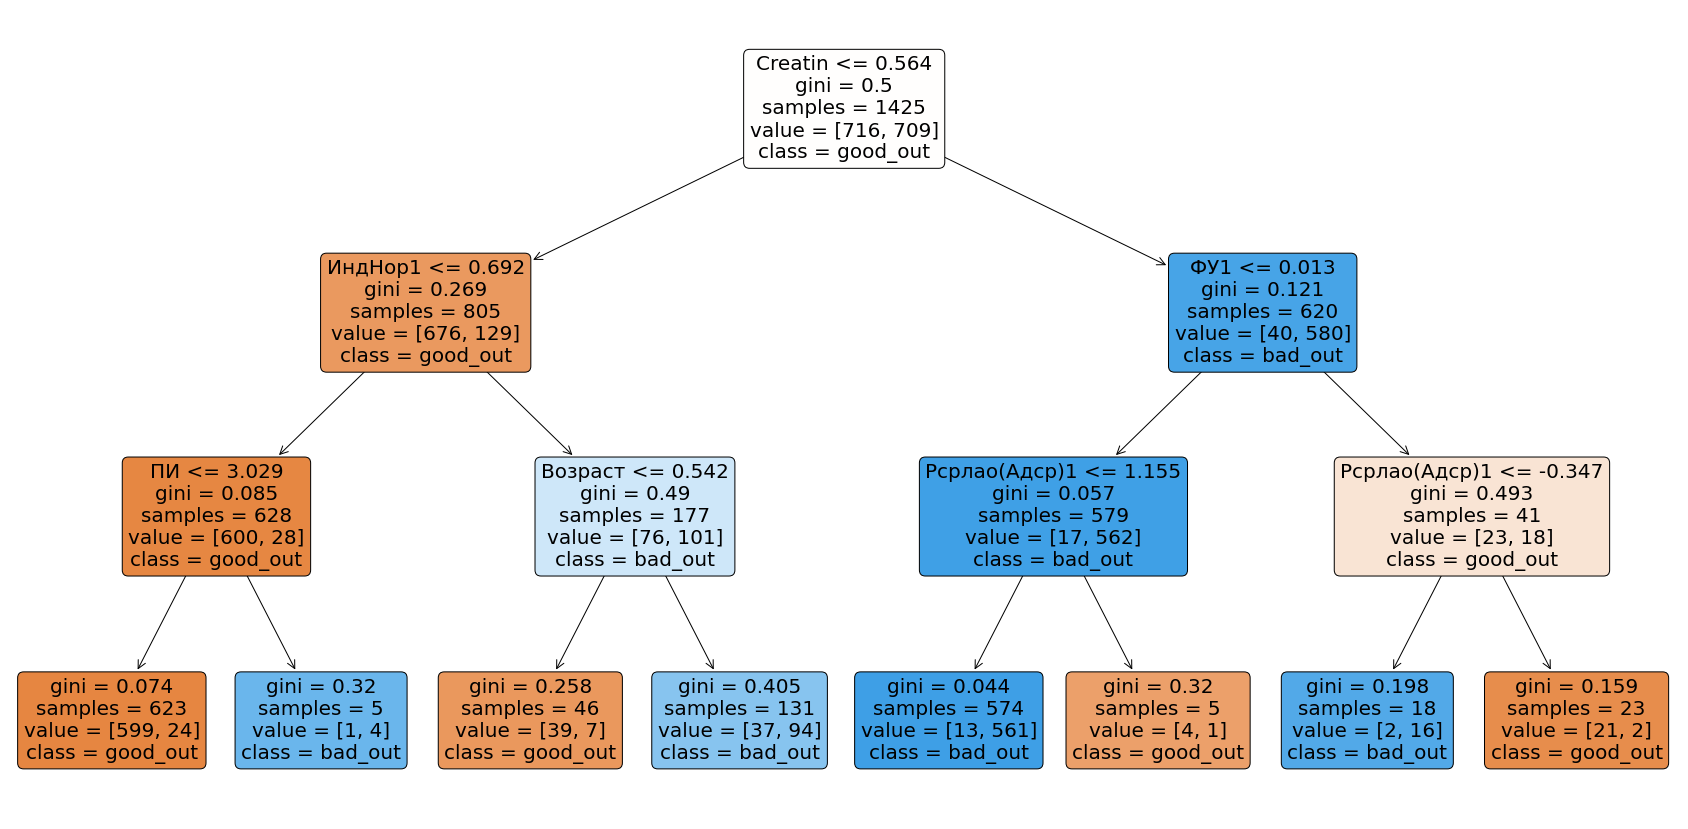

Results: 88.24%


In [290]:
from sklearn import tree

tr_over = tree.DecisionTreeClassifier(max_depth = 3, random_state=100).fit(X_train, y_train)

plt.figure(figsize = (30,15))  
_ = tree.plot_tree(tr_over, class_names = ["good_out", "bad_out"], feature_names = list(X_train.columns), 
             filled = True, fontsize = 20, rounded = True)
plt.show()
y_pred = tr_over.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

In [291]:
f1_score(y_test, y_pred)

0.890625

In [292]:
total_result_over['tree'] = results * 100

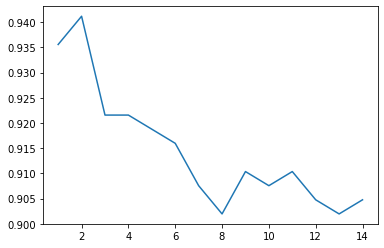

In [293]:
K_nearest_acc = []

for number in range(1, 15):
    clf = KNeighborsClassifier(n_neighbors = number).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    K_nearest_acc.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(1, 15)), K_nearest_acc)
plt.show()

In [294]:
kn_over = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
y_pred = kn_over.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 94.12%


In [295]:
f1_score(y_test, y_pred)


0.9440000000000001

In [296]:
total_result_over['knn'] = results * 100

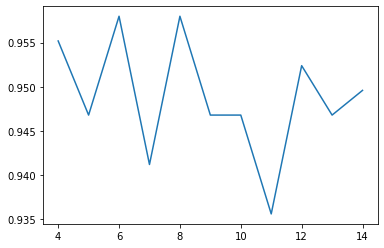

In [297]:
forest_acc = []

for number in range(4, 15):
    clf = RandomForestClassifier(n_estimators = number, random_state = 18, criterion = 'entropy').fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    forest_acc.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(4, 15)), forest_acc)
plt.show()

In [298]:
rf_over = RandomForestClassifier(n_estimators = 6, random_state = 18, criterion = 'entropy').fit(X_train, y_train)
y_pred = rf_over.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 95.80%


In [299]:
f1_score(y_test, y_pred)

0.9595687331536388

In [300]:
total_result_over['rand_forest'] = results * 100

In [302]:
nn_over = Sequential()

nn_over.add(Dense(10, input_dim = 16, activation = 'relu'))
nn_over.add(Dense(3, activation = 'relu'))
nn_over.add(Dense(3, activation = 'relu'))
nn_over.add(Dense(1, activation = 'sigmoid'))

nn_over.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

nn_over.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6488 - accuracy: 0.6178
Epoch 2/100
1425/1425 [==============================] - 2s 2ms/step - loss: 0.3582 - accuracy: 0.9233
Epoch 3/100
1425/1425 [==============================] - 2s 2ms/step - loss: 0.2692 - accuracy: 0.9365
Epoch 4/100
1425/1425 [==============================] - 2s 2ms/step - loss: 0.2117 - accuracy: 0.9567
Epoch 5/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.1745 - accuracy: 0.9645
Epoch 6/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.1679 - accuracy: 0.9562
Epoch 7/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.1516 - accuracy: 0.9613
Epoch 8/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.1468 - accuracy: 0.9634
Epoch 9/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.1190 - accuracy: 0.9700
Epoch 10/100
1425/1425 [==============================] - 3s 2ms/step - l

In [303]:
y_pred = nn_over.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
results = accuracy_score(y_test, y_pred)
print(results)

[[161  14]
 [  5 177]]
0.9467787114845938


In [304]:
f1_score(y_test, y_pred)

0.9490616621983915

In [305]:
total_result_over['nn'] = results * 100

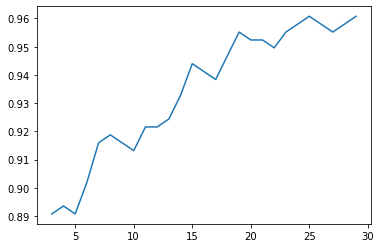

In [315]:
xg_acc_over = []

for number in range(3, 30):
    clf = XGBClassifier(n_estimators = number, max_depth = 4, random_state = 70, subsample = 0.8, eval_metric = "logloss").fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    xg_acc_over.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(3, 30)), xg_acc_over)
plt.show()

In [316]:
xg_over = XGBClassifier(n_estimators = 25, max_depth = 4, random_state = 70, subsample = 0.8, eval_metric = "logloss").fit(X_train, y_train)
y_pred = xg_over.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 96.08%


In [317]:
f1_score(y_test, y_pred)

0.9625668449197862

In [318]:
total_result_over['xg'] = results * 100

# Nothing changed

In [328]:
df_ = df.copy()
y = df_['Исход']
X = df_.drop(['Исход'], axis = 1)

In [329]:
X_new = X[selected_features.nlargest(16).index]
y_new = y

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 1)

In [366]:
X_test.shape

(200, 16)

In [289]:
X_train.to_csv('X_train_nothing.csv', index = True)
y_train.to_csv('y_train_nothing.csv', index = True)
X_test.to_csv('X_test_nothing.csv', index = True)
y_test.to_csv('y_test_nothing.csv', index = True)

In [398]:
lr_unch = LogisticRegression().fit(X_train, y_train)
y_pred = lr_unch.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 92.50%


In [399]:
from sklearn.metrics import f1_score

In [400]:
f1_score(y_test, y_pred)

0.6153846153846153

In [401]:
total_result_unch = {}

In [402]:
equ = ''
for i in range(len(X_train.columns)):
    if np.squeeze(lr_unch.coef_)[i] >= 0:
        equ += f' + {np.squeeze(lr_unch.coef_)[i]:.2f} * {X_train.columns[i]}'
    else:
        equ += f'{np.squeeze(lr_unch.coef_)[i]:.2f} * {X_train.columns[i]}'
equ += f' - {abs(lr_unch.intercept_[0]):.2f}'

In [403]:
equ

'-1.63 * Килип1 + 0.57 * ИндНор1 + 0.54 * Creatin + 2.96 * Тромболит3 + 1.27 * Килип4-0.39 * ФУ1 + 0.71 * ГБ6 + 0.58 * АКШ + 0.29 * Возраст + 0.40 * Килип3 + 0.20 * Рла1-0.04 * Килип2-0.33 * Кл.вар.ИМ1-1.59 * Хр.оч.инф2-0.33 * Pсрлао(Адср)1-0.22 * ПИ - 3.22'

In [404]:
total_result_unch['logreg'] = results * 100

Results: 97.00%


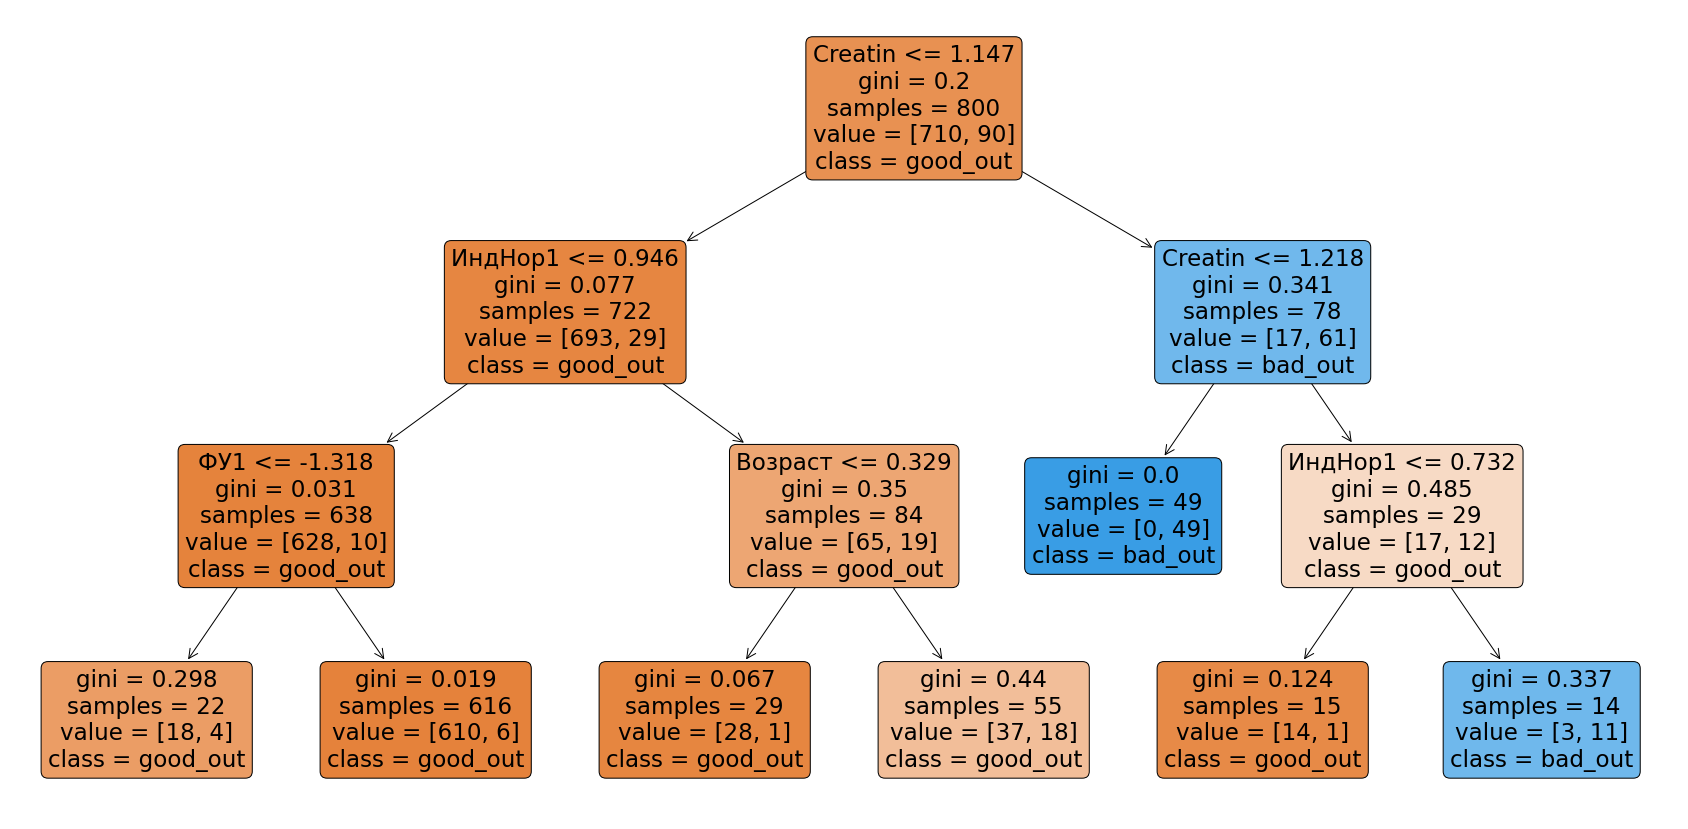

In [374]:
from sklearn import tree

tr_unch = tree.DecisionTreeClassifier(max_depth = 3, random_state=1).fit(X_train, y_train)
y_pred = tr_unch.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))
plt.figure(figsize = (30,15))  
_ = tree.plot_tree(tr_unch, class_names = ["good_out", "bad_out"], feature_names = list(X_train.columns), 
             filled = True, fontsize = 23, rounded = True)
plt.show()

In [375]:
f1_score(y_test, y_pred)

0.8333333333333333

In [376]:
total_result_unch['tree'] = results * 100

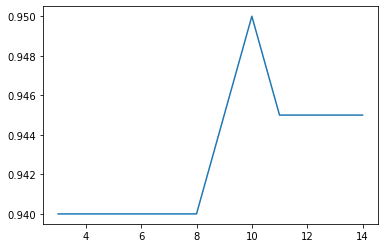

In [377]:
K_nearest_acc = []

for number in range(3, 15):
    clf = KNeighborsClassifier(n_neighbors = number).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    K_nearest_acc.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(3, 15)), K_nearest_acc)
plt.show()

In [378]:
kn_unch = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
y_pred = kn_unch.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 95.00%


In [379]:
f1_score(y_test, y_pred)

0.6875

In [380]:
total_result_unch['knn'] = results * 100

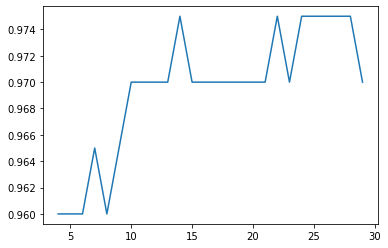

In [381]:
forest_acc = []

for number in range(4, 30):
    clf = RandomForestClassifier(n_estimators = number, random_state = 14, criterion = 'entropy').fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    forest_acc.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(4, 30)), forest_acc)
plt.show()

In [382]:
rf_unch = RandomForestClassifier(n_estimators = 14, random_state = 14, criterion = 'entropy').fit(X_train, y_train)
y_pred = rf_unch.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 97.50%


In [383]:
f1_score(y_test, y_pred)

0.8484848484848484

In [384]:
total_result_unch['rand_forest'] = results * 100

In [385]:
nn_unch = Sequential()

nn_unch.add(Dense(10, input_dim = 16, activation = 'relu'))
nn_unch.add(Dense(3, activation = 'relu'))
nn_unch.add(Dense(3, activation = 'relu'))
nn_unch.add(Dense(1, activation = 'sigmoid'))

nn_unch.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

nn_unch.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
800/800 [==============================] - 4s 2ms/step - loss: 0.6421 - accuracy: 0.8755
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4949 - accuracy: 0.8868
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4421 - accuracy: 0.8690
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3822 - accuracy: 0.8923
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3561 - accuracy: 0.8967
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2896 - accuracy: 0.9262
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2155 - accuracy: 0.9513
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1935 - accuracy: 0.9654
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1782 - accuracy: 0.9611
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.2064 - accura

In [386]:
y_pred = nn_unch.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
results = accuracy_score(y_test, y_pred)
print(results)

[[175   6]
 [  7  12]]
0.935


In [387]:
f1_score(y_test, y_pred)

0.6486486486486486

In [388]:
total_result_unch['nn'] = results * 100

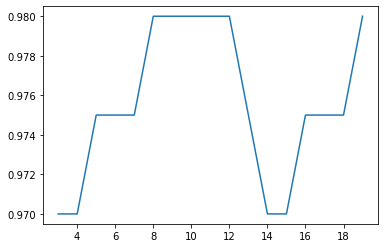

In [389]:
xg_acc_unch = []

for number in range(3, 20):
    clf = XGBClassifier(n_estimators = number, max_depth = 5, random_state = 11, subsample = 0.7, eval_metric = "logloss").fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    xg_acc_unch.append(accuracy_score(y_test, y_pred))
    
plt.plot(list(range(3, 20)), xg_acc_unch)
plt.show()

In [390]:
xg_unch = XGBClassifier(n_estimators = 10, max_depth = 5, random_state = 11, subsample = 0.7, eval_metric = "logloss").fit(X_train, y_train)
y_pred = xg_unch.predict(X_test)
results = accuracy_score(y_test, y_pred)
print("Results: %.2f%%" % (results * 100))

Results: 98.00%


In [391]:
f1_score(y_test, y_pred)

0.8823529411764706

In [392]:
total_result_unch['xg'] = results * 100

# смотрим результаты

In [733]:
val_result_under = {}
val_result_over = {}
val_result_unchanged = {}

In [734]:
data = pd.read_excel('data_diplom.xls', header = 1)
X_val = val
y_val = data.loc[val.index]['Исход']

In [735]:
y_val[y_val == 1] = 0
y_val[y_val == 2] = 1

In [736]:
X_val = X_val[selected_features.nlargest(16).index]

In [737]:
pred_under_lr = lr_under.predict(X_val)
pred_over_lr = lr_over.predict(X_val)
pred_unch_lr = lr_unch.predict(X_val)

In [738]:
pred_under_knn = kn_under.predict(X_val)
pred_over_knn = kn_over.predict(X_val)
pred_unch_knn = kn_unch.predict(X_val)

In [739]:
pred_under_rf = rf_under.predict(X_val)
pred_over_rf = rf_over.predict(X_val)
pred_unch_rf = rf_unch.predict(X_val)

In [740]:
pred_under_nn = (nn_under.predict(X_val) > 0.5)
pred_over_nn = (nn_over.predict(X_val) > 0.5)
pred_unch_nn = (nn_unch.predict(X_val) > 0.5)

In [741]:
pred_under_xg = xg_under.predict(X_val)
pred_over_xg = xg_over.predict(X_val)
pred_unch_xg = xg_unch.predict(X_val)

In [743]:
val_result_under['lr'] = f1_score(y_val, pred_under_lr)
val_result_over['lr'] = f1_score(y_val, pred_over_lr)
val_result_unchanged['lr'] = f1_score(y_val, pred_unch_lr)

In [744]:
val_result_under['knn'] = f1_score(y_val, pred_under_knn)
val_result_over['knn'] = f1_score(y_val, pred_over_knn)
val_result_unchanged['knn'] = f1_score(y_val, pred_unch_knn)

In [745]:
val_result_under['rf'] = f1_score(y_val, pred_under_rf)
val_result_over['rf'] = f1_score(y_val, pred_over_rf)
val_result_unchanged['rf'] = f1_score(y_val, pred_unch_rf)

In [746]:
val_result_under['nn'] = f1_score(y_val, pred_under_nn)
val_result_over['nn'] = f1_score(y_val, pred_over_nn)
val_result_unchanged['nn'] = f1_score(y_val, pred_unch_nn)

In [747]:
val_result_under['xg'] = f1_score(y_val, pred_under_xg)
val_result_over['xg'] = f1_score(y_val, pred_over_xg)
val_result_unchanged['xg'] = f1_score(y_val, pred_unch_xg)

In [748]:
val_result_under

{'lr': 0.8571428571428572,
 'knn': 0.8095238095238095,
 'rf': 0.8780487804878048,
 'nn': 0.8571428571428572,
 'xg': 0.9}

In [749]:
val_result_over

{'lr': 0.8571428571428572,
 'knn': 0.8421052631578948,
 'rf': 0.8947368421052632,
 'nn': 0.8947368421052632,
 'xg': 0.9230769230769231}

In [750]:
val_result_unchanged

{'lr': 0.787878787878788,
 'knn': 0.8235294117647058,
 'rf': 0.8648648648648648,
 'nn': 0.8421052631578948,
 'xg': 0.888888888888889}

In [751]:
val_result_under['lr'] = accuracy_score(y_val, pred_under_lr)
val_result_over['lr'] = accuracy_score(y_val, pred_over_lr)
val_result_unchanged['lr'] = accuracy_score(y_val, pred_unch_lr)

In [752]:
val_result_under['knn'] = accuracy_score(y_val, pred_under_knn)
val_result_over['knn'] = accuracy_score(y_val, pred_over_knn)
val_result_unchanged['knn'] = accuracy_score(y_val, pred_unch_knn)

In [753]:
val_result_under['rf'] = accuracy_score(y_val, pred_under_rf)
val_result_over['rf'] = accuracy_score(y_val, pred_over_rf)
val_result_unchanged['rf'] = accuracy_score(y_val, pred_unch_rf)

In [754]:
val_result_under['nn'] = accuracy_score(y_val, pred_under_nn)
val_result_over['nn'] = accuracy_score(y_val, pred_over_nn)
val_result_unchanged['nn'] = accuracy_score(y_val, pred_unch_nn)

In [755]:
val_result_under['xg'] = accuracy_score(y_val, pred_under_xg)
val_result_over['xg'] = accuracy_score(y_val, pred_over_xg)
val_result_unchanged['xg'] = accuracy_score(y_val, pred_unch_xg)

In [756]:
val_result_under

{'lr': 0.85, 'knn': 0.8, 'rf': 0.875, 'nn': 0.85, 'xg': 0.9}

In [757]:
val_result_over

{'lr': 0.85, 'knn': 0.85, 'rf': 0.9, 'nn': 0.9, 'xg': 0.925}

In [758]:
val_result_unchanged

{'lr': 0.825, 'knn': 0.85, 'rf': 0.875, 'nn': 0.85, 'xg': 0.9}

In [797]:
total_result_under = {}
total_result_over = {}
total_result_unch = {}
total_result_underf = {}
total_result_overf = {}
total_result_unchf = {}

total_result_under['logistic \n regression'] = 84
total_result_under['knn'] = 88.64
total_result_under['random \n forest'] = 90.91
total_result_under['neural \n network'] = 90.9
total_result_under['xgboost'] = 93.18
total_result_under['SuperTML \n два столбца'] = 93.2
total_result_under['SuperTML \n квадрат'] = 88.6
total_result_under['NODE \n 2 слоя'] = 86.4
total_result_under['NODE \n 3 слоя'] = 90.9

total_result_underf['logistic \n regression'] = 86.8
total_result_underf['knn'] = 86.5
total_result_underf['random \n forest'] = 92.3
total_result_underf['nn'] = 92.3
total_result_underf['xgboost'] = 94.34
total_result_underf['NODE \n 2 слоя'] = 88.9
total_result_underf['NODE \n 3 слоя'] = 92.3



total_result_over['logistic \n regression'] = 90.2
total_result_over['knn'] = 94.12
total_result_over['random \n forest'] = 95.8
total_result_over['neural \n network'] = 94.7
total_result_over['xgboost'] = 96.08
total_result_over['SuperTML \n два столбца'] = 97.5
total_result_over['SuperTML \n квадрат'] = 96.7
total_result_over['NODE \n 2 слоя'] = 94.67
total_result_over['NODE \n 3 слоя'] = 92.44

total_result_overf['logistic \n regression'] = 90.7
total_result_overf['knn'] = 94.4
total_result_overf['random \n forest'] = 95.96
total_result_overf['neural \n network'] = 94.9
total_result_overf['xgboost'] = 96.26
total_result_overf['NODE \n 2 слоя'] = 95.02
total_result_overf['NODE \n 3 слоя'] = 92.68


total_result_unch['logistic \n regression'] = 92.5
total_result_unch['knn'] = 95
total_result_unch['random \n forest'] = 97.5
total_result_unch['neural \n network'] = 93.5
total_result_unch['xgboost'] = 98
total_result_unch['SuperTML \n два столбца'] = 97
total_result_unch['SuperTML \n квадрат'] = 98.5
total_result_unch['NODE \n 2 слоя'] = 96
total_result_unch['NODE \n 3 слоя'] = 96.5

total_result_unchf['logistic \n regression'] = 61.5
total_result_unchf['knn'] = 68.75
total_result_unchf['random \n forest'] = 84.85
total_result_unchf['neural \n network'] = 64.87
total_result_unchf['xgboost'] = 88.2
total_result_unchf['NODE \n 2 слоя'] = 79
total_result_unchf['NODE \n 3 слоя'] = 81

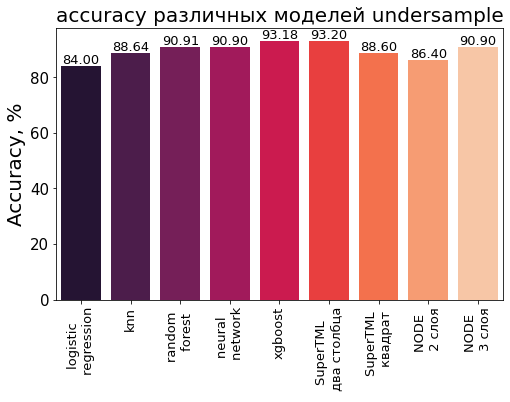

In [798]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = list(total_result_under.keys()), y = list(total_result_under.values()), palette = "rocket", saturation = 2)
plt.ylabel("Accuracy, %", fontsize = 20)

plt.title("accuracy различных моделей undersample", fontsize = 20)

plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 15)

for col in ax.patches:
    x, y = col.get_xy() 
    width, height = col.get_width(), col.get_height()
    
    ax.annotate(f'{height:.2f}', (x + width/2, y + height * 1.01), ha = 'center', fontsize = 13)
    
plt.show()

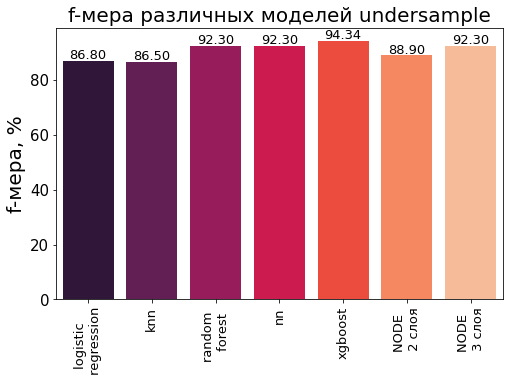

In [805]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = list(total_result_underf.keys()), y = list(total_result_underf.values()), palette = "rocket", saturation = 2)

plt.ylabel("f-мера, %", fontsize = 20)

plt.title("f-мера различных моделей undersample", fontsize = 20)

plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 15)

for col in ax.patches:
    x, y = col.get_xy() 
    width, height = col.get_width(), col.get_height()
    
    ax.annotate(f'{height:.2f}', (x + width/2, y + height * 1.01), ha = 'center', fontsize = 13)
    
plt.show()

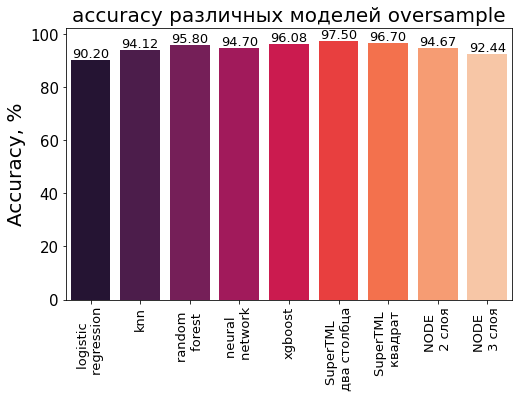

In [806]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = list(total_result_over.keys()), y = list(total_result_over.values()), palette = "rocket", saturation = 2)

plt.ylabel("Accuracy, %", fontsize = 20)

plt.title("accuracy различных моделей oversample", fontsize = 20)

plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 15)

for col in ax.patches:
    x, y = col.get_xy() 
    width, height = col.get_width(), col.get_height()
    
    ax.annotate(f'{height:.2f}', (x + width/2, y + height * 1.01), ha = 'center', fontsize = 13)
    
plt.show()

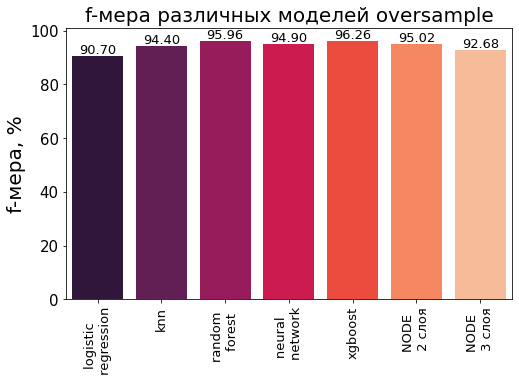

In [807]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = list(total_result_overf.keys()), y = list(total_result_overf.values()), palette = "rocket", saturation = 2)

plt.ylabel("f-мера, %", fontsize = 20)

plt.title("f-мера различных моделей oversample", fontsize = 20)

plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 15)

for col in ax.patches:
    x, y = col.get_xy() 
    width, height = col.get_width(), col.get_height()
    
    ax.annotate(f'{height:.2f}', (x + width/2, y + height * 1.01), ha = 'center', fontsize = 13)
    
plt.show()

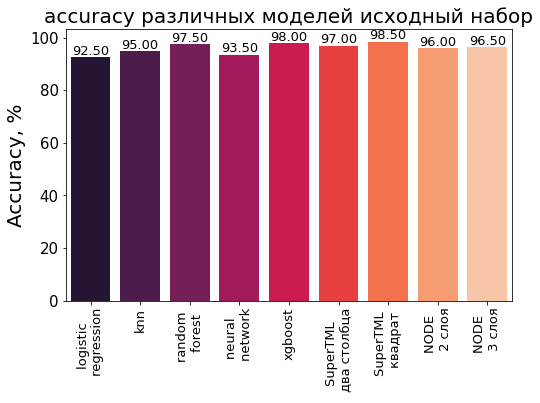

In [808]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = list(total_result_unch.keys()), y = list(total_result_unch.values()), palette = "rocket", saturation = 2)

plt.ylabel("Accuracy, %", fontsize = 20)

plt.title("accuracy различных моделей исходный набор", fontsize = 20)

plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 15)

for col in ax.patches:
    x, y = col.get_xy() 
    width, height = col.get_width(), col.get_height()
    
    ax.annotate(f'{height:.2f}', (x + width/2, y + height * 1.01), ha = 'center', fontsize = 13)
    
plt.show()

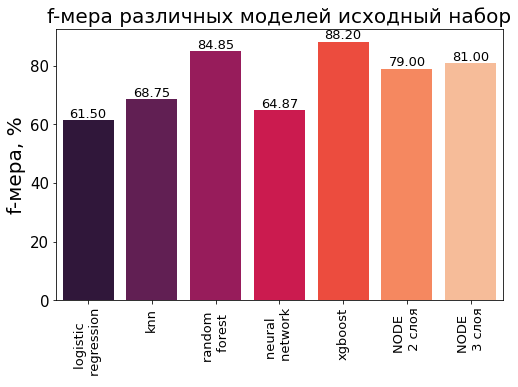

In [809]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = list(total_result_unchf.keys()), y = list(total_result_unchf.values()), palette = "rocket", saturation = 2)

plt.ylabel("f-мера, %", fontsize = 20)

plt.title("f-мера различных моделей исходный набор", fontsize = 20)

plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 15)

for col in ax.patches:
    x, y = col.get_xy() 
    width, height = col.get_width(), col.get_height()
    
    ax.annotate(f'{height:.2f}', (x + width/2, y + height * 1.01), ha = 'center', fontsize = 13)
    
plt.show()